# Chipotle 데이터를 가지고 원하는 주제로 데이터분석


## 데이터 불러오기

In [66]:
import pandas as pd

df = pd.read_csv('/content/sample_data/chipotle.tsv', sep='\t')
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### 주제 1. 판매량 순위를 나타내는 막대그래프 및 파이그래프

In [67]:
df["item_name"].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [68]:
# 품목별 총 판매량
item = df.groupby("item_name")["quantity"].sum().sort_values(ascending=False)

<Axes: ylabel='quantity'>

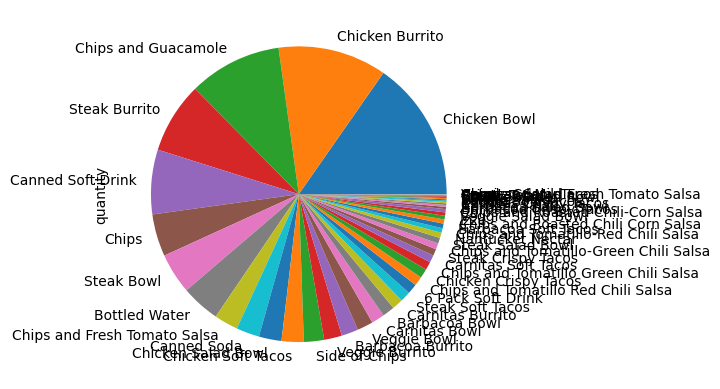

In [69]:
# 판매량 파이 그래프
item.plot.pie()

In [70]:
# 총 판매량 상위 10개
bestitem = item.nlargest(10)

<Axes: xlabel='item_name'>

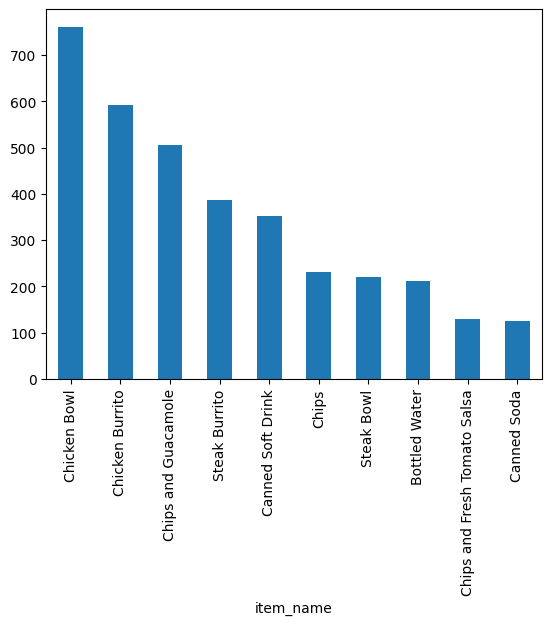

In [71]:
# 총 판매량 상위 10개 막대그래프
bestitem.plot.bar()

<Axes: ylabel='quantity'>

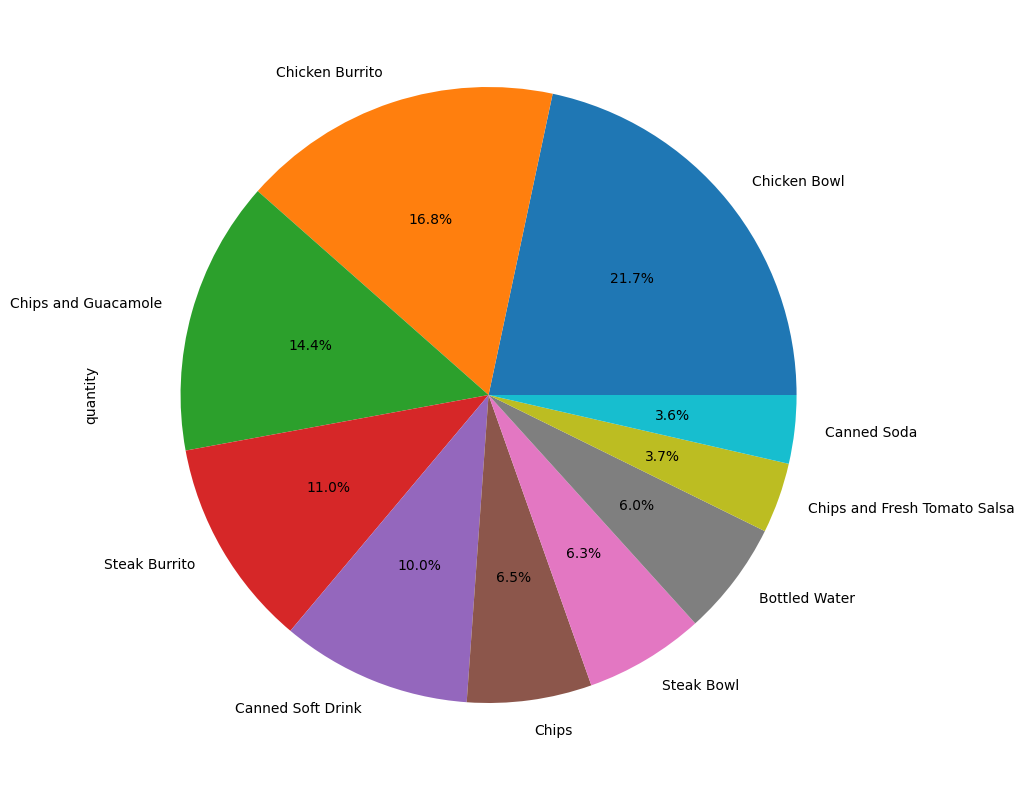

In [72]:
# 총 판매량 상위 10개 파이그래프
bestitem.plot.pie(figsize=(10, 10), autopct='%1.1f%%')

### 주제 2. chickenBowl 중 가장 많이 팔리는 종류를 나타내는 막대그래프

In [73]:
# chicken Bowl 많이 팔리는 종류
Chi_Bowl = df[df['item_name'] == 'Chicken Bowl']

In [74]:
Chi_Bowl.head(10)

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",$8.49
42,20,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$11.25
76,34,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$8.75
78,34,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$8.75
99,44,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Fajita Vege...",$8.75
110,49,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",$8.75


In [75]:
Chi_Bowl_best = Chi_Bowl.groupby("choice_description")["quantity"].sum().sort_values(ascending=False)
print(Chi_Bowl_best)

choice_description
[Fresh Tomato Salsa, [Fajita Vegetables, Rice]]                                                            17
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                     16
[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream, Lettuce]]                                                  14
[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Lettuce]]                                                   14
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]                          14
                                                                                                           ..
[Roasted Chili Corn Salsa, [Fajita Vegetables, Lettuce, Black Beans]]                                       1
[Roasted Chili Corn Salsa, [Fajita Vegetables, Pinto Beans, Sour Cream, Guacamole]]                         1
[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Guacamole, Lettuce]]       

<Axes: ylabel='choice_description'>

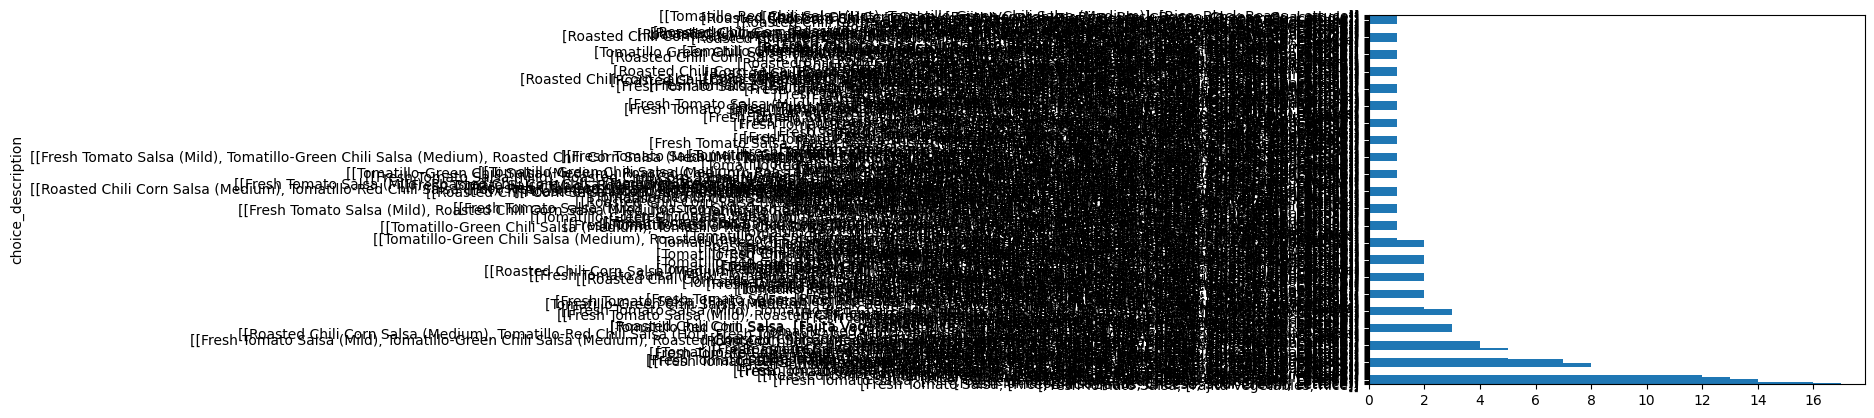

In [76]:
Chi_Bowl_best.plot.barh()

In [77]:
# 치볼 상위 10개만
bestchibowl = Chi_Bowl_best.nlargest(10)
print(bestchibowl)

choice_description
[Fresh Tomato Salsa, [Fajita Vegetables, Rice]]                                             17
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                      16
[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream, Lettuce]]                                   14
[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Lettuce]]                                    14
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]           14
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese]]                                           13
[Fresh Tomato Salsa, [Rice, Cheese, Lettuce]]                                               13
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]                               12
[Tomatillo Green Chili Salsa, [Rice, Pinto Beans, Sour Cream, Lettuce]]                     12
[[Roasted Chili Corn Salsa (Medium), Fresh Tomato Salsa (Mild)], [Rice, Fajita Veggies]]    10
Name: quantity, dtype: int64


<Axes: ylabel='choice_description'>

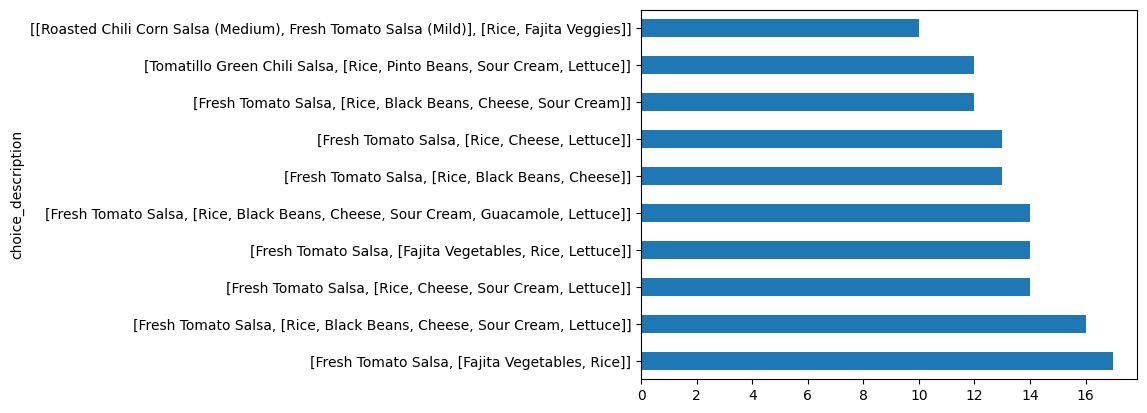

In [78]:
bestchibowl.plot.barh()

### 주제 3. 어떤 orderid가 가장 매출이 높은지 나타내는 막대 그래프



In [101]:
# 가격 열 확인

df['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [102]:
# 문자 $ 제거
df['item_price']=df['item_price'].apply(lambda x : float(x[1:]))
df['item_price'].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [103]:
# 총 가격 구한 후 정렬
total_prices = df.groupby('order_id')['item_price'].sum()
total_prices = total_prices.sort_values(ascending=False)
total_prices

order_id
926     205.25
1443    160.74
1483    139.00
691     118.25
1786    114.30
         ...  
17       10.08
889      10.08
1014     10.08
1303     10.08
1602     10.08
Name: item_price, Length: 1834, dtype: float64

<Axes: xlabel='order_id'>

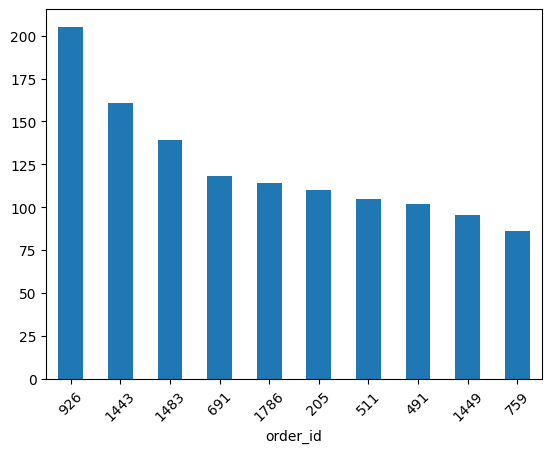

In [104]:
# 상위 10개만 막대그래프로 표현
total_prices.head(10).plot.bar(rot=45)